# Integrating Kidney data using scMFG

## The following tutorial demonstrates how to use scMFG for *integrating* Kidney data. 

In [17]:
from scmfg import SCMFG
import scanpy as sc
import muon as mu
import numpy as np

In [18]:
np.random.seed(0)

In [19]:
data_dir = 'data/kidney'


## Load data

In [20]:

rna = sc.read_h5ad(data_dir + "RNA.h5ad")
atac = sc.read_h5ad(data_dir + "ATAC.h5ad")
mdata = mu.MuData({"rna": rna, "atac": atac})
mdata.obs["cell_name"] = mdata["rna"].obs["cell_name"]
print(mdata)

MuData object with n_obs × n_vars = 8837 × 302325
  obs:	'cell_name'
  2 modalities
    rna:	8837 x 49584
      obs:	'cell_name', 'size_factors'
    atac:	8837 x 252741
      obs:	'cell_name'


## Integrating data using scMFG

In [21]:
model = SCMFG(mdata)
model.run()

k_num: 15
k_num: 15

        #########################################################
        ###           __  __  ____  ______                    ### 
        ###          |  \/  |/ __ \|  ____/\    _             ### 
        ###          | \  / | |  | | |__ /  \ _| |_           ### 
        ###          | |\/| | |  | |  __/ /\ \_   _|          ###
        ###          | |  | | |__| | | / ____ \|_|            ###
        ###          |_|  |_|\____/|_|/_/    \_\              ###
        ###                                                   ### 
        ######################################################### 
       
 
        
Loaded view='rna' group='group1' with N=8837 samples and D=111 features...
Loaded view='atac' group='group1' with N=8837 samples and D=407 features...


Model options:
- Automatic Relevance Determination prior on the factors: True
- Automatic Relevance Determination prior on the weights: True
- Spike-and-slab prior on the factors: False
- Spike-and-slab prior

## Visualize the embedding

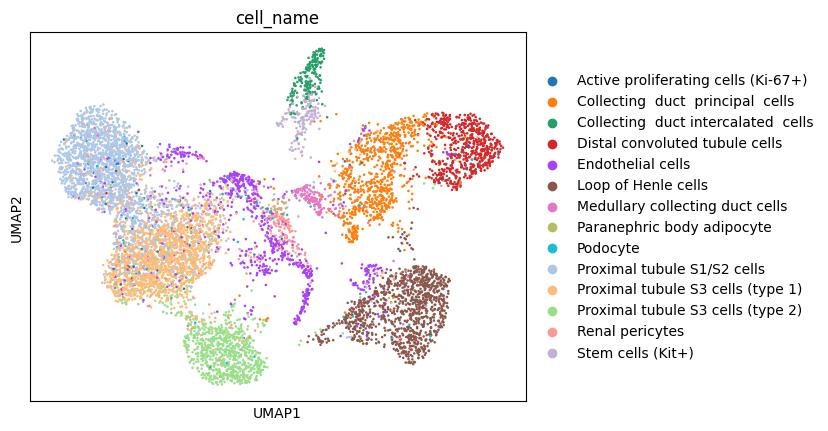

In [22]:
sc.pp.neighbors(mdata, use_rep="X_scMFG")
sc.tl.umap(mdata)
sc.pl.umap(mdata, color=['cell_name'])